<a href="https://colab.research.google.com/github/Alex-Chen1121/Machine-learning/blob/main/6_19_Classification_%E6%B1%BA%E7%AD%96%E6%A8%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

#載入資料集
iris=load_iris()


#利用pandas印出資料表格
df= pd.DataFrame(iris["data"], columns=iris["feature_names"])

#答案就是target aka 鳶尾花品種
df["ans"]=iris["target"]

#DESCR 資料集的介紹
#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#把 資料分成兩部分 一部分叫做訓練資料 一部分叫做驗證資料
from sklearn.model_selection import train_test_split
import numpy as np

# axis=1 左右相接 axis=0 上下相接
x = df.drop(["ans"], axis=1)
# 驗證資料
y=df['ans']

# 進到機器學習的流程後 將datafram改成numpy
x= np.array(x)
y= np.array(y)

#91切劃分資料集與測試集
#要先轉成array格式
#若要切割固定 可以用 random_state=10 來固定切分資料(要與shuffle合起來運用)
#shuffle=bool 要或是不要洗牌 默認為洗牌

x_train, x_test, y_train, y_test=train_test_split(x , y, test_size=0.1)


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#先建出功能容器
clf =DecisionTreeClassifier()
#再將資料餵入 同時有資料集 及驗證集
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

[Text(0.4444444444444444, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [45, 46, 44]\nclass = versicolor'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.5555555555555556, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 46, 44]\nclass = versicolor'),
 Text(0.4444444444444444, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.177\nsamples = 51\nvalue = [0, 46, 5]\nclass = versicolor'),
 Text(0.2222222222222222, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.043\nsamples = 45\nvalue = [0, 44, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = versicolor'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6666666666666666, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Tex

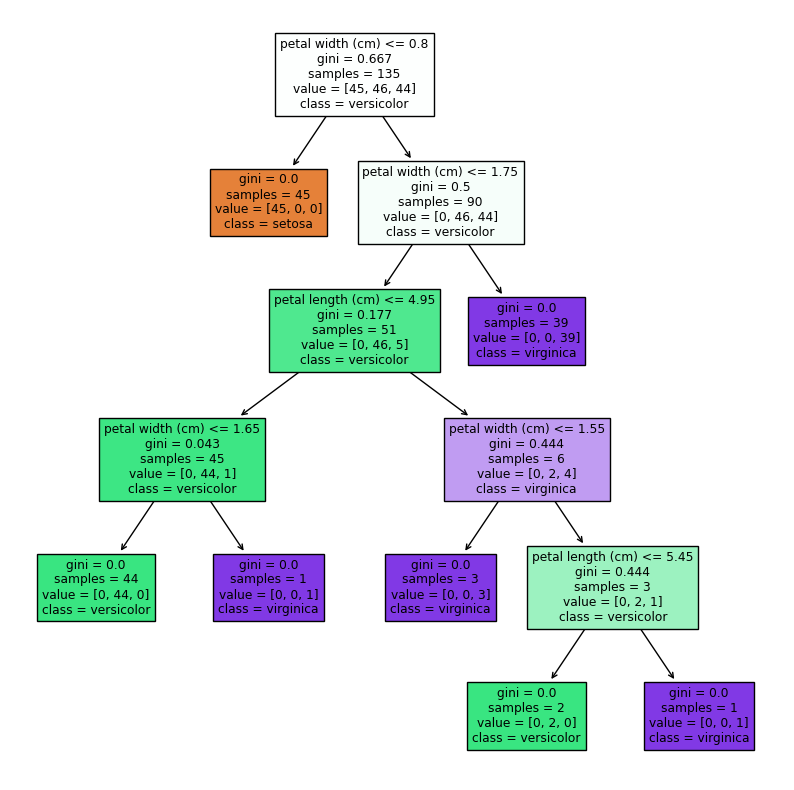

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
#classname 類別名稱
#filled 是否上色
#feature_name 特徵分類名
plot_tree(clf,
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled=True,
          )
#gini吉尼係數=猜錯的機率

In [ ]:
#對答案
#監督式學習
from sklearn.metrics import accuracy_score
#評估模型
pre=clf.predict(x_test)
#準確率
accuracy_score(y_test, pre)


0.9333333333333333

In [ ]:
#交叉驗證 降低運氣成分
#測1~9 10或1~8 10 跟9
#切成十份後取平均

from sklearn.model_selection import cross_val_score

clf =DecisionTreeClassifier()
clf.fit(x_train, y_train)
scores= cross_val_score(clf, x, y, cv=10, n_jobs=-1)

print(10,scores)
print("average",np.average(scores))

10 [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
average 0.96
